# Communicating Results

### Learning Objectives
After this lesson, you will be able to:

- Explain the trade-offs between the precision and recall of a model while articulating the cost of false positives vs. false negatives.
- Describe the difference between visualization for presentations vs. exploratory data analysis
- Identify the components of a concise, convincing report and how they relate to specific audiences/stakeholders

In [11]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

import sklearn.linear_model as lm

In [21]:
# Import the flight_delays dataset
df = pd.read_csv('../../data/flight_delays.csv')
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,CRS_DEP_TIME,DEP_TIME,DEP_DEL15,Unnamed: 15
0,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,1289203,32575,900,855.0,0.0,NaN
1,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,1247802,31703,900,856.0,0.0,NaN
2,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,1289203,32575,1230,1226.0,0.0,NaN
3,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,1247802,31703,1220,1214.0,0.0,NaN
4,1,4,2015-01-01,AA,19805,AA,11298,1129803,30194,12173,1217302,32134,1305,1754.0,1.0,NaN


In [22]:
# Remove rows where target, DEP_DEL15, is null
df = df[df['DEP_DEL15'].notnull()].copy()

# Convert UNIQUE_CARRIER to a dummy variable
df = pd.get_dummies(df, prefix='CARRIER', columns=['UNIQUE_CARRIER'])

# Convert DAY_OF_WEEK to a dummy variable
df = pd.get_dummies(df, prefix='DOW', columns=['DAY_OF_WEEK'], drop_first=True)

# Create features and target set
features = [col for col in df.columns if 'DOW_' in col] + ['CRS_DEP_TIME']
target = 'DEP_DEL15'

X = df[features]
y = df[target]

cls = lm.LogisticRegression()
cls.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
# Predict probability of delay
df['probability'] = cls.predict_proba(X)[:, 1]

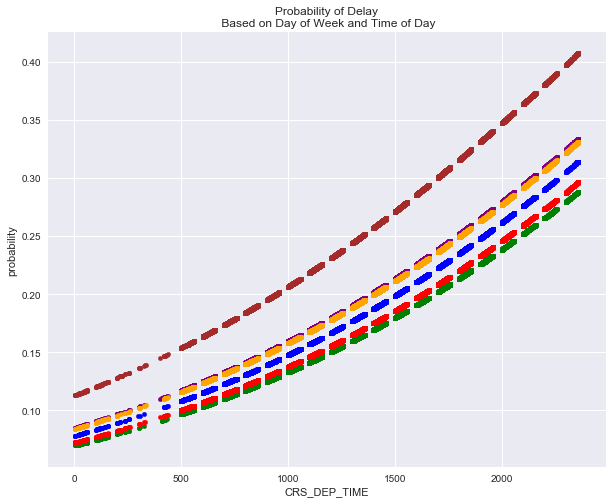

In [45]:
# Plot probability against the day of week
ax = plt.gca()
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

for index, color in enumerate(colors):
    
    dow = features[index]
    df[df[dow] == 1].plot(
        x='CRS_DEP_TIME', 
        y='probability', 
        kind='scatter', 
        color=color,
        figsize=(10,8),
        ax=ax,
    )

ax.set(title='Probability of Delay\n Based on Day of Week and Time of Day')

In [46]:
zip(features, colors)

[('DOW_2', 'blue'),
 ('DOW_3', 'green'),
 ('DOW_4', 'red'),
 ('DOW_5', 'purple'),
 ('DOW_6', 'orange'),
 ('DOW_7', 'brown')]

[(0, 1),
 (0, 1),

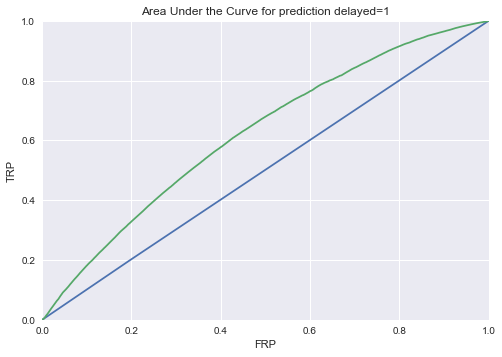

In [51]:
from sklearn.dummy import DummyClassifier
from sklearn import metrics

dummy = DummyClassifier()
dummy.fit(X, y)

df['probability_dummy'] = dummy.predict_proba(X)[:, 1]

ax = plt.gca()

vals = metrics.roc_curve(y, df['probability_dummy'])
ax.plot(vals[0], vals[1])

vals = metrics.roc_curve(y, df['probability'])
ax.plot(vals[0], vals[1])

ax.set(
    title='Area Under the Curve for prediction delayed=1', 
    ylabel='TRP',
    xlabel='FRP', 
    xlim=(0, 1), 
    ylim=(0, 1)
)